Found 1350 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 731ms/step - accuracy: 0.1696 - loss: 2.3256 - val_accuracy: 0.4733 - val_loss: 1.6724
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 602ms/step - accuracy: 0.5923 - loss: 1.4346 - val_accuracy: 0.5667 - val_loss: 1.2903
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 595ms/step - accuracy: 0.7340 - loss: 1.0317 - val_accuracy: 0.6800 - val_loss: 1.0578
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 603ms/step - accuracy: 0.8005 - loss: 0.7699 - val_accuracy: 0.7400 - val_loss: 0.9268
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - accuracy: 0.8358 - loss: 0.6519 - val_accuracy: 0.7667 - val_loss: 0.8484
Model saved as C:\Users\Harshal\Downloads\archive\data\food-101-tiny\train\dish.keras
Please select an image to classify...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
Predicted Food: ice_cream
Estimated Calories: 220 kcal


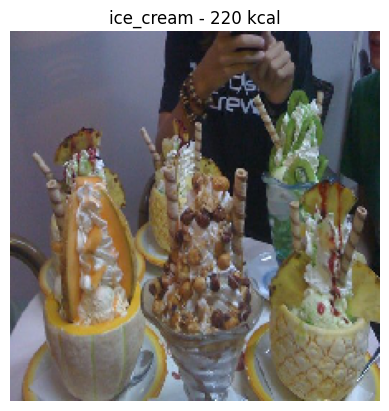

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# === Step 1: Define Data Path ===
train_dir = r"C:\Users\Harshal\Downloads\archive\data\food-101-tiny\train"
img_size = (224, 224)
batch_size = 32

# === Step 2: Data Generator ===
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
label_map = {v: k for k, v in class_indices.items()}

# === Step 3: Build Model ===
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# === Step 4: Train Model ===
model.fit(train_gen, validation_data=val_gen, epochs=5)

# === Step 5: Save Model ===
model_save_path = os.path.join(train_dir, "dish.keras")
model.save(model_save_path)
print(f"Model saved as {model_save_path}")

# === Step 6: Calorie Dictionary ===
calorie_dict = {
    "pizza": 300,
    "steak": 400,
    "salad": 150,
    "burger": 500,
    "soup": 120,
    "cake": 350,
    "sandwich": 250,
    "noodles": 270,
    "rice": 200,
    "fries": 320,
    "ice_cream": 220,
}

# === Step 7: Prediction Function ===
def predict_food(img_path):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    food_name = label_map.get(class_idx, "Unknown")
    calories = calorie_dict.get(food_name.lower(), "Unknown")

    return food_name, calories, img

# === Step 8: GUI for Image Upload and Display ===
root = tk.Tk()
root.withdraw()
print("Please select an image to classify...")

file_path = filedialog.askopenfilename(
    title="Select an Image",
    filetypes=[("Image files", "*.jpg *.png *.jpeg")]
)

if file_path:
    food, cal, img_obj = predict_food(file_path)
    print(f"Predicted Food: {food}")
    print(f"Estimated Calories: {cal} kcal")

    plt.imshow(img_obj)
    plt.title(f"{food} - {cal} kcal")
    plt.axis('off')
    plt.show()
else:
    print("No image selected.")
